# Google Play Store Visualization


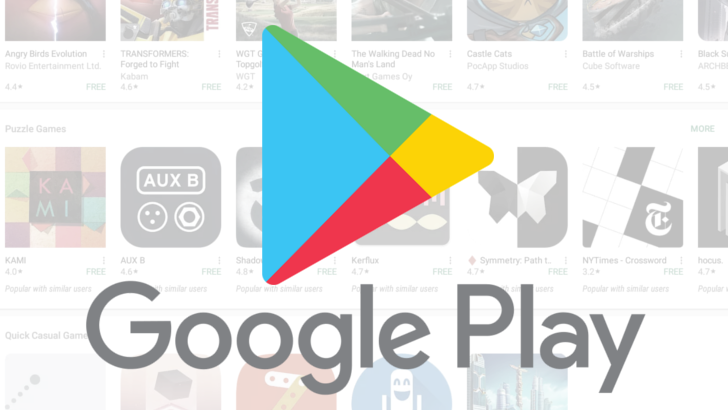

# Exploratory Data Analysis

# Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches

%matplotlib inline

# Data exploration

In [2]:
#Reading the Data

data = pd.read_csv('googleplaystore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
print(data.shape)

(10841, 13)


In [5]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


In [6]:
data.dropna(how ='any', inplace = True)

In [7]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)


,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


In [8]:
print(data.shape)

(9360, 13)


Finding

After remove missing data,
our data contain 9,360 records with 13 fields

# Rating

In [9]:
data['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Rating')

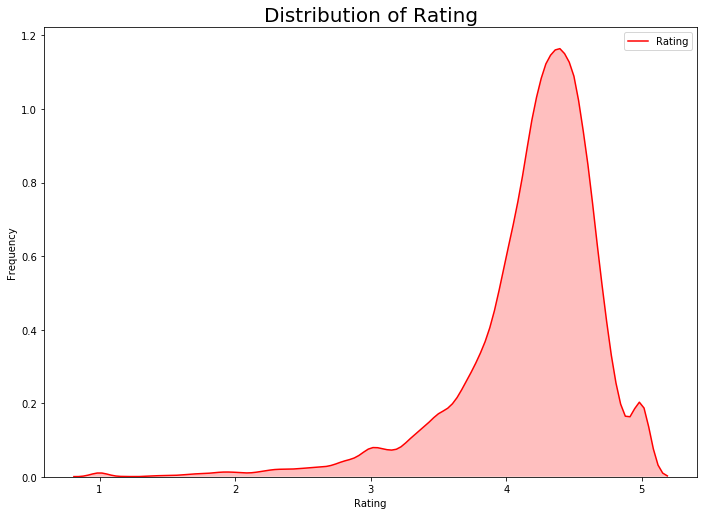

In [10]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

Finding

Average of rating of application in store is around 4 which is very high

# Category

In [11]:
print( len(data['Category'].unique()) , "categories")

print("\n", data['Category'].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'Count of app in each category')

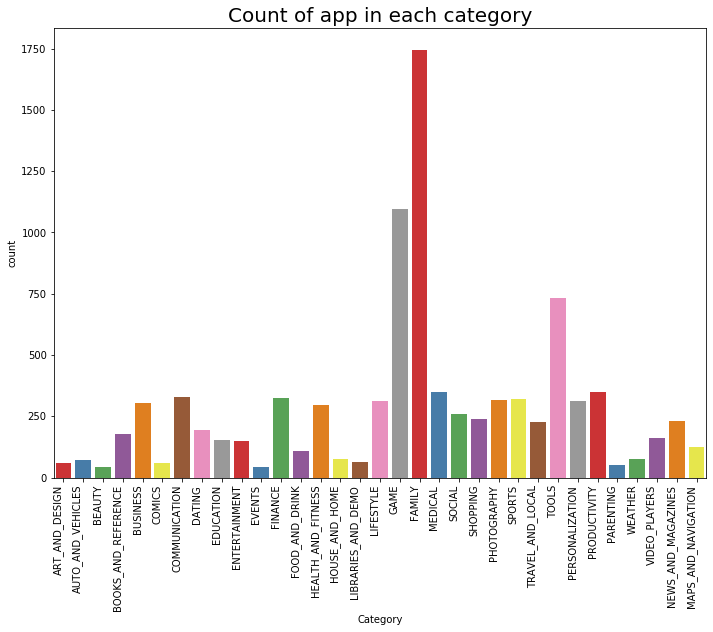

In [12]:
g = sns.countplot(x="Category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

Finding

Game and Family category are the most appearances for application in store

Text(0.5, 1, 'Boxplot of Rating VS Category')

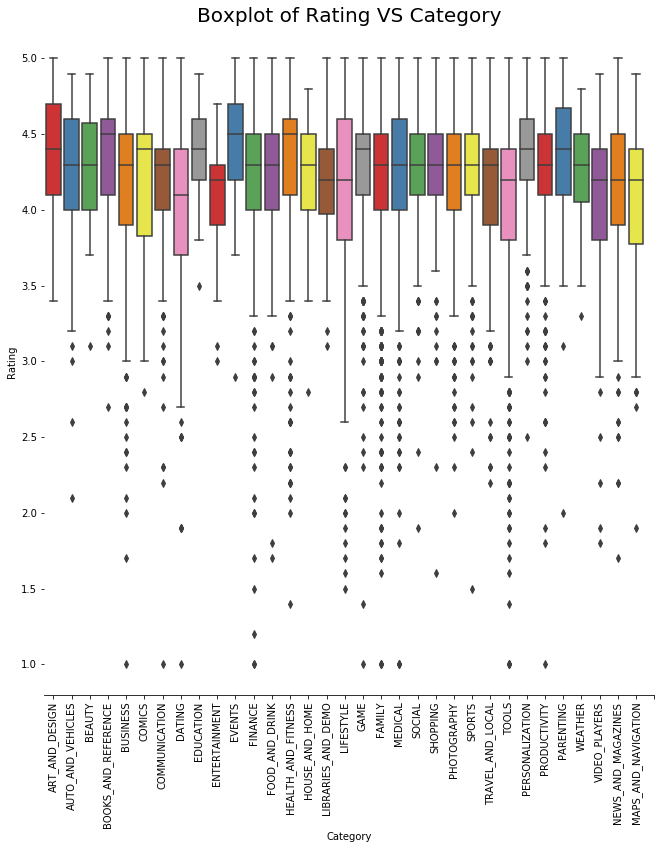

In [13]:
g = sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

Finding

Rating of application in each category is not different too much 

# Reviews

In [14]:
data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

Finding

Data still in object type, we need to convert to int

In [15]:
# convert to int

data['Reviews'] = data['Reviews'].apply(lambda x: int(x))

Text(0.5, 1.0, 'Distribution of Reveiw')

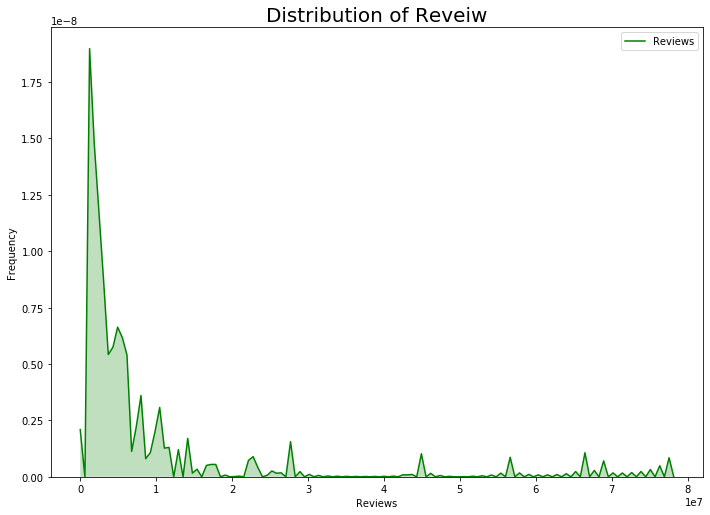

In [16]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

In [17]:
data[data.Reviews > 5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


Finding

Most of application in this store have less than 1M in reviews.
Obviously, well-known applictions have a lot of reviews

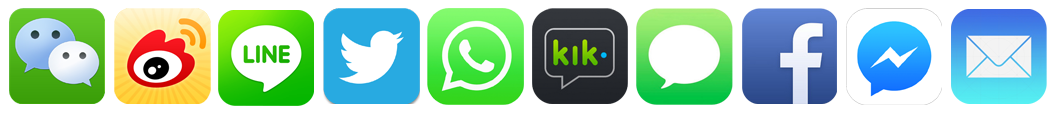

<Figure size 720x720 with 0 Axes>

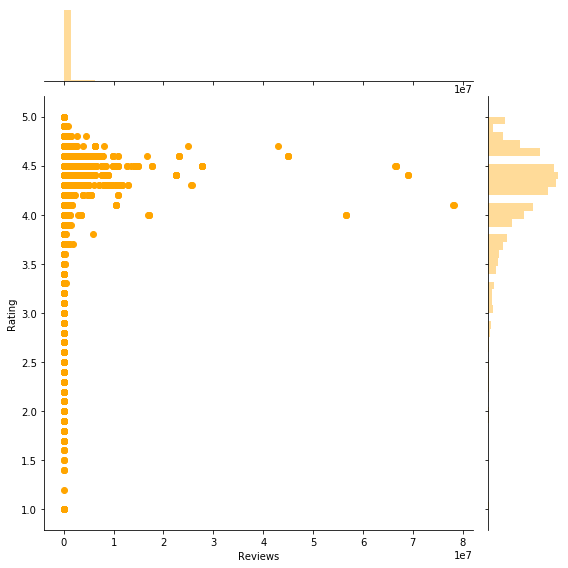

In [18]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Reviews", y="Rating",color = 'orange', data=data,size = 8);

Text(0.5, 1.0, 'Rating VS Reveiws')

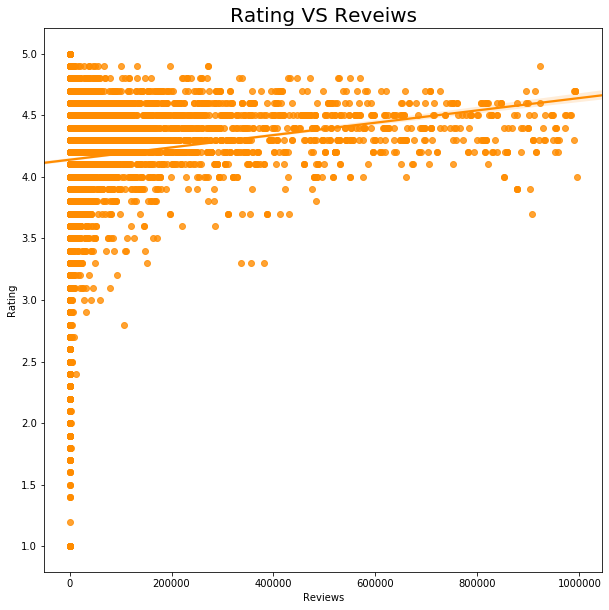

In [19]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=data[data['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

Finding

Seem like well-known application will get a good rating

# Size

In [20]:
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [21]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

Finding

Data still in object type, and contain the metric symbol for the perefix,
and special size which are "Varies with device" that we need to deal with it.

In [22]:
len(data[data.Size == 'Varies with device'])


1637

In [23]:
# change it to NA first
data['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [24]:
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [25]:
data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True)

Note

I decide to fill "Varies with device" with mean of size in each category

<Figure size 720x720 with 0 Axes>

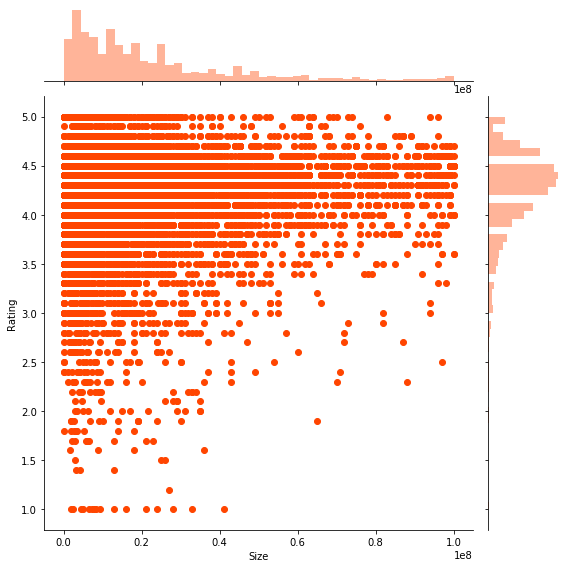

In [28]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=data, size = 8);

# Installs

In [27]:
data['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

Finding

Data still in object type, and contain the plus sign


In [29]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

Note

I encode it by order of size;
ex: 0 refer to 1+
    1 refer to 5+
    2 refer  to 10+

In [30]:
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

In [31]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [32]:
Sorted_value = sorted(list(data['Installs'].unique()))

In [33]:
data['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )

In [34]:
data['Installs'].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Rating VS Installs')

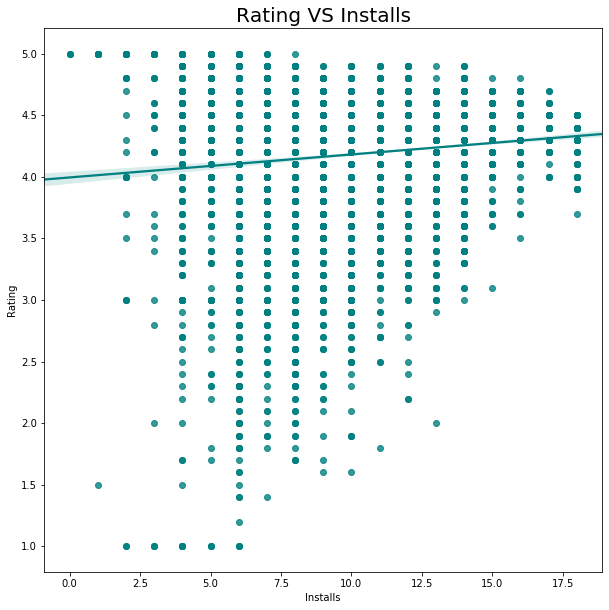

In [35]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data);
plt.title('Rating VS Installs',size = 20)

Finding

Seem like number of install affect to rating


# Type

In [36]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

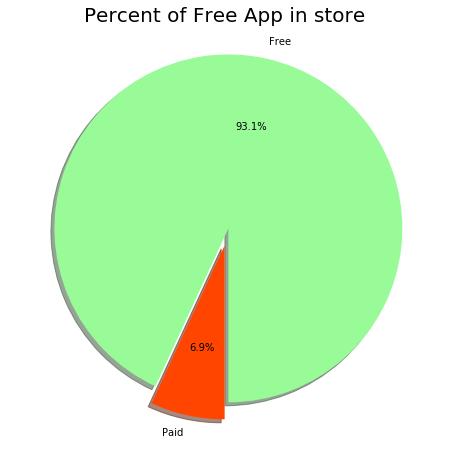

In [37]:
# Data to plot
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.show()

Finding

Most of application in this store are free (93.1%).

Note

Because string can't enter to model, I need to change format a little bit

In [38]:
data['Free'] = data['Type'].map(lambda s :1  if s =='Free' else 0)
data.drop(['Type'], axis=1, inplace=True)

# Price

In [39]:
data['Price'].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [40]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

Finding

Data is in object type, in format of dollar sign.

In [41]:
data['Price'].value_counts().head(30)


0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
$3.99        58
$1.49        30
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$3.49         7
$7.99         7
$29.99        6
$11.99        5
$12.99        5
$24.99        5
$19.99        5
$8.99         4
$10.00        3
$5.49         3
$16.99        3
$7.49         2
$1.70         2
$17.99        2
$33.99        2
$10.99        2
Name: Price, dtype: int64

In [42]:
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))


In [43]:
data['Price'].describe()


count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Finding

Average of price is around 0.96, but most of them are free (8715 from 9360).
The most expensive app is 400 dollar !!!.

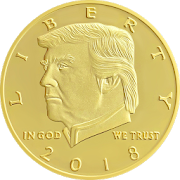

In [44]:
data[data['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,8,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,0


Text(0.5, 1.0, 'Scatter plot Rating VS Price')

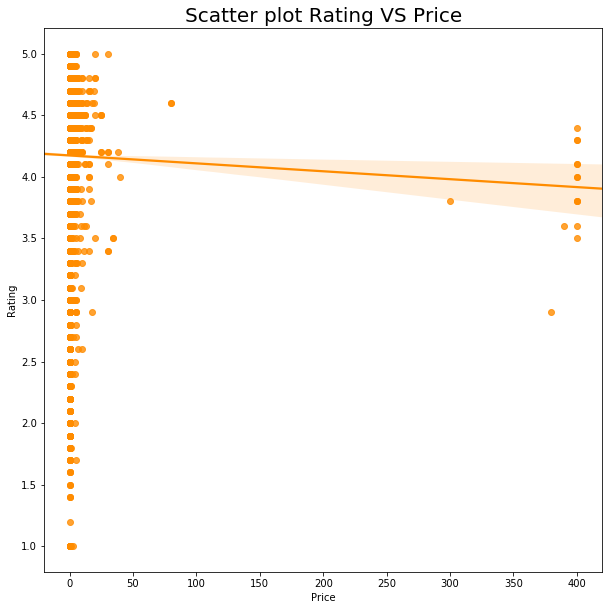

In [45]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=data[data['Reviews']<1000000]);
plt.title('Scatter plot Rating VS Price',size = 20)

Finding

Higher price application may make customer disappointed, if they are not good enough.


Note

Try to visualize in type of band, it may easier to understand


In [46]:
data.loc[ data['Price'] == 0, 'PriceBand'] = '0 Free'
data.loc[(data['Price'] > 0) & (data['Price'] <= 0.99), 'PriceBand'] = '1 cheap'
data.loc[(data['Price'] > 0.99) & (data['Price'] <= 2.99), 'PriceBand']   = '2 not cheap'
data.loc[(data['Price'] > 2.99) & (data['Price'] <= 4.99), 'PriceBand']   = '3 normal'
data.loc[(data['Price'] > 4.99) & (data['Price'] <= 14.99), 'PriceBand']   = '4 expensive'
data.loc[(data['Price'] > 14.99) & (data['Price'] <= 29.99), 'PriceBand']   = '5 too expensive'
data.loc[(data['Price'] > 29.99), 'PriceBand']  = '6 FXXXing expensive'

In [47]:
data[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,0 Free,4.186288
1,1 cheap,4.300943
2,2 not cheap,4.292975
3,3 normal,4.250318
4,4 expensive,4.269149
5,5 too expensive,4.252000
6,6 FXXXing expensive,3.923810


Text(0.5, 1, 'Boxen plot Rating VS PriceBand')

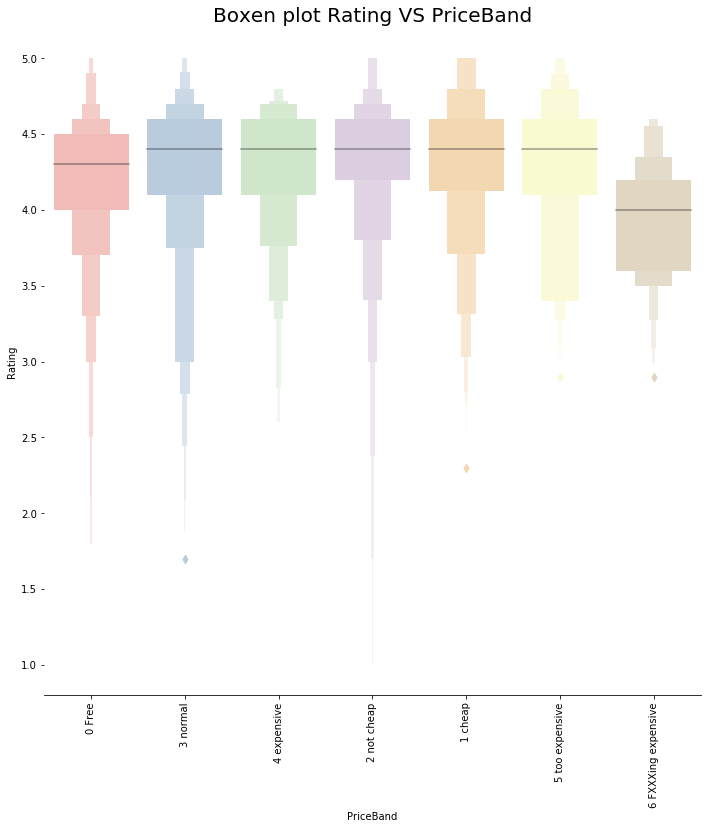

In [48]:
g = sns.catplot(x="PriceBand",y="Rating",data=data, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)

Finding

Price are not effect to rating ,but if it is very expensive, it might get low rating

In [49]:
import random

def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color

In [50]:
# Create palette for categories

flatui = []
for i in range(0,len(data['Category'].unique()),1):
    flatui.append(generate_color())


Text(0.5, 1, 'Category in each Priceband VS Rating')

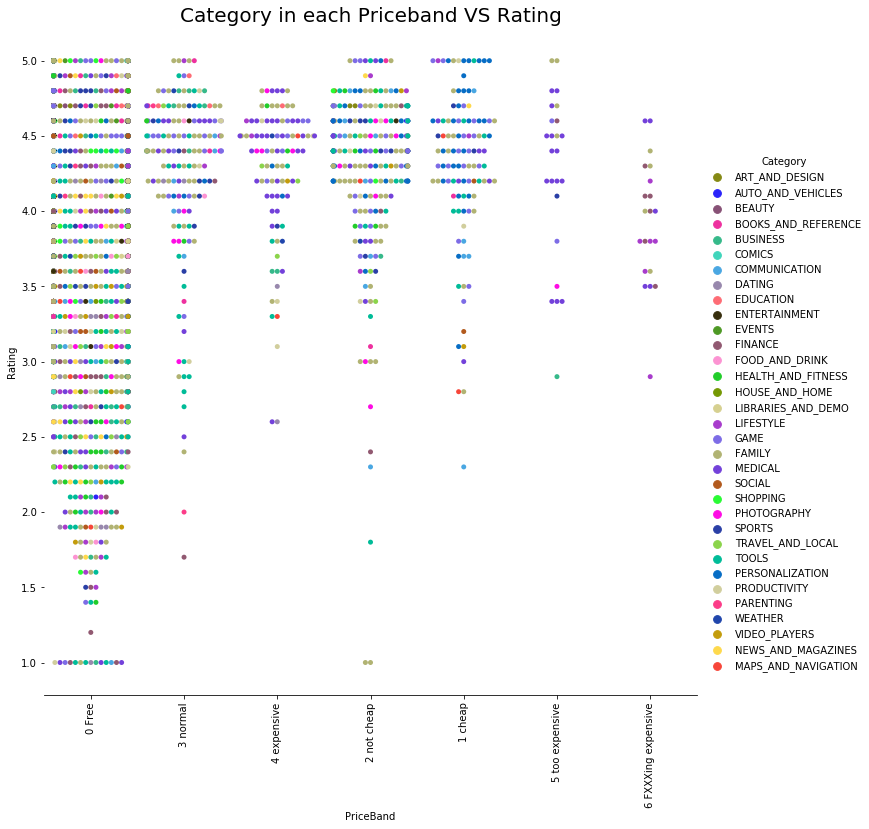

In [52]:
g = sns.catplot(x="PriceBand", y="Rating", hue="Category", kind="swarm", data=data,palette = flatui,size = 10)
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.title('Category in each Priceband VS Rating',size = 20)

# Content Rating

In [53]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Text(0.5, 1, 'Box plot Rating VS Content Rating')

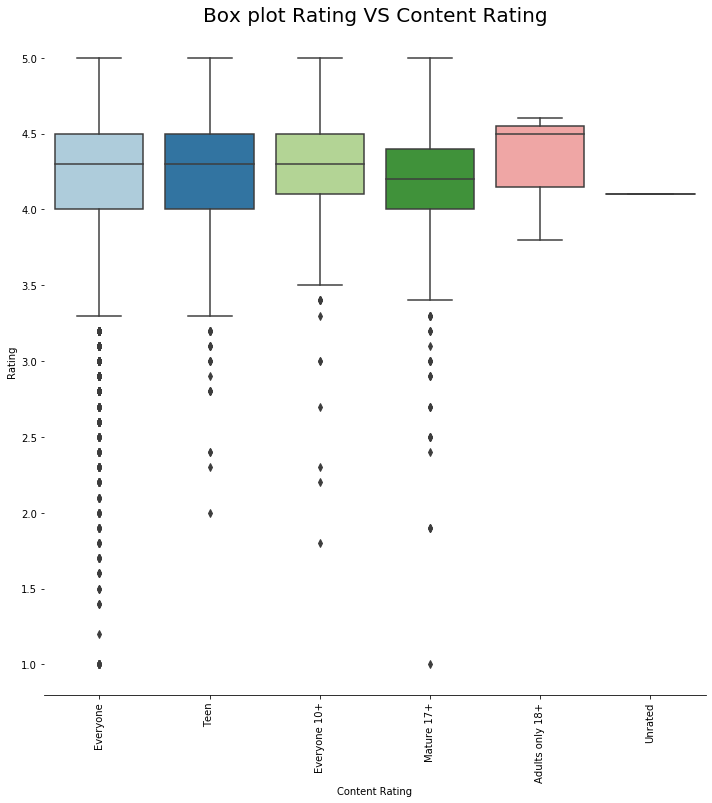

In [54]:
g = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

Finding

Content Rating not effect too much to rating, 
but in Mature applications ,look like they get lower rating than other.

In [55]:
data[data['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,9,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,1,0 Free


In [56]:
data = data[data['Content Rating'] != 'Unrated']

Note

I decide to drop 'Unrated' rating because it contain only 1 record

In [ ]:
data = pd.get_dummies(data, columns= ["Content Rating"])

# Genres

In [ ]:
print( len(data['Genres'].unique()) , "genres")

print("\n", data['Genres'].unique())

In [ ]:
data.Genres.value_counts().head(10)

In [ ]:
data.Genres.value_counts().tail(10)

Note

Many genre contain only few record, it may make a bias.
Then, I decide to group it to bigger genre by ignore sub-genre (after " ; " sign)

In [ ]:
data['Genres'] = data['Genres'].str.split(';').str[0]


In [ ]:
print( len(data['Genres'].unique()) , "genres")

print("\n", data['Genres'].unique())

In [ ]:
data.Genres.value_counts().tail(10)

Note

Group Music & Audio  as  Music

In [ ]:
data['Genres'].replace('Music & Audio', 'Music',inplace = True)

In [ ]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().describe()

In [ ]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').head(1)


In [ ]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').tail(1)

Finding

Observing from Standard Deviation, seem like genre is not effect too much to rating.
The lowest of an average rating on genres (Dating) is 3.97 
while the highest (Events) is 4.43

In [ ]:
g = sns.catplot(x="Genres",y="Rating",data=data, kind="boxen", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxenplot of Rating VS Genres',size = 20)

# Last Updated

Finding

"Last Updated" feature still in String format, we need to change it in someway for plot or put it in model

Note

I decide to change it to "datetime" format but it still can't use in raw,
I create new feature which called "lastupdate",
"lastupdate" will contain how long is this app got update in last time (... days ago).
I assume that today is the day which the latest Update of application in this dataset (2018 - 08 -08)

In [ ]:
data['new'] = pd.to_datetime(data['Last Updated'])
data['new'].describe()


In [ ]:
# new format of  Last Updated
data['new'].max() 

In [ ]:
# Example of finding difference between two dates in pandas
data['new'][0] -  data['new'].max()

In [ ]:
data['lastupdate'] = (data['new'] -  data['new'].max()).dt.days
data['lastupdate'].head()

In [ ]:
plt.figure(figsize = (10,10))
sns.regplot(x="lastupdate", y="Rating", color = 'lightpink',data=data );
plt.title('Rating  VS Last Update( days ago )',size = 20)